# Table of Contents
- [Problem Statement](#problem-statement)
- [Data Preparation](#data-preparation)
    - [Prepare feature release_clause](#prepare-releaseclause)
    - [Prepare feature wage](#prepare-releaseclause)
    - [Prepare feature value](#prepare-value)
    - [Prepare feature work_rate](#prepare-work_rate)
    - [Prepare feature no_position](#prepare-no_position)
- [Feature importance analysis](#feature-importance-analysis)
- [EDA](#eda)
    - [Correlation coefficient](#correlation-coefficient)
- [Model using all feature](#making-model-all-feature)
    - [Ridge regression](#ridge-model-all-feature)
        - [Tuning alpha](#5.1.1)
        - [Performance on full train set](#5.1.2)
        - [Performance on test set](#5.1.3)
    - [Decision tree regressor](#decision-tree-all-feature)
        - [Tuning max_depth and min_sample_leafs](#5.2.1)
        - [Performance on full train set](#5.2.2)
        - [Performance on test set](#5.2.3)
    - [Random forest regressor](#random-forest-all-feature)
        - [Tuning max_depth and min_samples_leaf](#5.3.1)
        - [Performance on full train set](#5.3.2)
        - [Performance on test set](#5.3.3)
    - [XGboost](#xgboost-all-feature)
        - [Tuning max_depth and min_samples_leaf ](#5.4.1)
        - [Performance on full train set](#5.4.2)
        - [Performance on test set](#5.4.3)
- [Model using subset of features](#making-model-th1-feature)
    - [Ridge regression](#ridge-model-th1-feature)
        - [Tuning alpha](#6.1.1)
        - [Performance on full train set](#6.1.2)
        - [Performance on test set](#6.1.3)
    - [Decision tree regressor](#decision-tree-th1-feature)
        - [Tuning max_depth and min_sample_leafs](#6.2.1)
        - [Performance on full train set](#6.2.2)
        - [Performance on test set](#6.2.3)
    - [Random forest regressor](#random-forest-th1-feature)
        - [Tuning max_depth and min_samples_leaf ](#6.3.1)
        - [Performance on full train set](#6.3.2)
        - [Performance on test set](#6.3.3)
    - [XGboost](#xgboost-th1-feature)
        - [Tuning max_depth and min_samples_leaf](#6.4.1)
        - [Performance on full train set](#6.4.2)
        - [Performance on test set](#6.4.3)
- [Model using subset of features](#making-model-th2-feature)
    - [Ridge regression](#ridge-model-th2-feature)
        - [Tuning alpha](#7.1.1)
        - [Performance on full train set](#7.1.2)
        - [Performance on test set](#7.1.3)
    - [Decision tree regressor](#decision-tree-th2-feature)
        - [Tuning max_depth and min_sample_leafs](#7.2.1)
        - [Performance on full train set](#7.2.2)
        - [Performance on test set](#7.2.3)
    - [Random forest regressor](#random-forest-th2-feature)
        - [Tuning max_depth and min_samples_leaf](#7.3.1)
        - [Performance on full train set](#7.3.2)
        - [Performance on test set](#7.3.3)
    - [XGboost](#xgboost-th2-feature)
        - [Tuning max_depth and min_samples_leaf ](#7.4.1)
        - [Performance on full train set](#7.4.2)
        - [Performance on test set](#7.4.3)
- [Model using subset of features](#making-model-th3-feature)
    - [Ridge regression](#ridge-model-th3-feature)
        - [Tuning alpha](#8.1.1)
        - [Performance on full train set](#8.1.2)
        - [Performance on test set](#8.1.3)
    - [Decision tree regressor](#decision-tree-th3-feature)
        - [Tuning max_depth and min_sample_leafs](#8.2.1)
        - [Performance on full train set](#8.2.2)
        - [Performance on test set](#8.2.3)
    - [Random forest regressor](#random-forest-th3-feature)
        - [Tuning max_depth and min_samples_leafe ](#8.3.1)
        - [Performance on full train set](#8.3.2)
        - [Performance on test set](#8.3.3)
    - [XGboost](#xgboost-th3-feature)
        - [Tuning max_depth and min_samples_leaf](#8.4.1)
        - [Performance on full train set](#8.4.2)
        - [Performance on test set](#8.4.3)
- [Chosen model](#end)



# Problem Statement
<a id='problem-statement'></a>

FIFA19 is video game series about football produced by EA SPORTS .
This game provide estimation of player's attribute,that correspond 
to technical abilities  like dribbling,shooting etc or non technical
thing like international reputation , work rate.Based on some weighting
on attribute ,that depend on player's position , overall rating of player calculated 
.On this project , i want to predict overall rating of player based on some
technical and non technical abilities that provided. The data can downloaded from 
[kaggle](https://www.kaggle.com/karangadiya/fifa19). Information about attribute can be seen on fifa team website
[attribute explanation](https://fifauteam.com/fifa-19-attributes-guide/#22) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
def adjusted_r2(r2,df):
    return 1- ( (1-r2**2)*(len(df)-1) )/(len(df)-df.shape[1]-1)

In [3]:
df=pd.read_csv('data.csv')
df.columns=df.columns.str.lower().str.replace(' ','_')

In [4]:
df.head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,...,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Data preparation
<a id='data-preparation'></a>

In [5]:
df=df.drop(["unnamed:_0",'id','joined','name','nationality','photo',
            'flag','club','club_logo','real_face','jersey_number',
            'loaned_from','contract_valid_until',
            'potential','preferred_foot','body_type',
            'nationality','height','weight'],axis=1)

## Prepare feature release_clause
<a id='prepare-releaseclause'></a>

* This section change the value of column 'release_clause' . Before the change the values are like '€20.3K','€1M' etc,then after the change  , 20300.0 , 1000000

In [6]:
df = df.dropna(subset=['release_clause'] )
df=df.reset_index(drop=True)

df.release_clause=df.release_clause.astype('str')

df['dummy']=np.arange(len(df))
def fun0(row):
    unit=row.release_clause[-1]
    row.dummy=unit
    row.release_clause=row.release_clause.replace('€','').replace(unit,'')
    return row

df=df.apply(fun0,axis=1)
df.dummy=df.dummy.map({'M': 10**6, 'K': 10**3})

def fun1(row):
    row.release_clause=float(row.release_clause) * row.dummy
    return row

df=df.apply(fun1 ,axis=1,)

del df['dummy']

## Prepare feature wage
<a id='prepare-wage'></a>

* This section change the value of column 'wage' . Before the change the values are like '€20.3K','€1M' etc,then after the change  , 20300.0 , 1000000

In [7]:
df.wage=df.wage.astype('str')

df['dummy']=np.arange(len(df))
def fun2(row):
    unit=row.wage[-1]
    row.dummy=unit
    row.wage=row.wage.replace('€','').replace(unit,'')
    return row

df=df.apply(fun2,axis=1)
df.dummy=df.dummy.map({'M': 10**6, 'K': 10**3})

def fun3(row):
    row.wage=float(row.wage) * row.dummy
    return row

df=df.apply(fun3 ,axis=1,)

del df['dummy']

## Prepare feature value
<a id='prepare-value'></a>

* This section change the value of column 'value' . Before the change the values are like '€20.3K','€1M' etc,then after the change  , 20300.0 , 1000000

In [8]:
df.value=df.value.astype('str')

df['dummy']=np.arange(len(df))
def fun4(row):
    unit=row.value[-1]
    row.dummy=unit
    row.value=row.value.replace('€','').replace(unit,'')
    return row

df=df.apply(fun4,axis=1)
df.dummy=df.dummy.map({'M': 10**6, 'K': 10**3})

def fun5(row):
    row.value=float(row.value) * row.dummy
    return row

df=df.apply(fun5 ,axis=1,)

del df['dummy']

Now the features that not have missing values are :
* age
* overall
* special
* release_clause
* wage
* value

Feature that rate  player to play at a position like 'ls','st' etc have missing values because player with position 'gk' assigned with NaN value at that feature

## Prepare feature work_rate
<a id='prepare-work_rate'></a>

* This section make new feature 'att_wr' and 'def_wr' from feature 'work_rate' , and after that 'work_rate' feature deleted.Ex: value in some row in the column 'work_rate' is 'Medium/High' , then value in column 'att_wr' is 'Medium' and value in 'def_wr' is 'High'

* Map the value in column 'att_wr' and 'def_wr' , with map {'Low':0,'Medium':1,'High':2}

In [9]:
df = df.dropna(subset=['work_rate'] )
df=df.reset_index(drop=True)
df['dummy']=df.work_rate.str.split('/')
#create column dummy , where value of each row is like ['Low','Medium'] etc ,where first element is for attacking work rate
# and second element for defending work rate

def split(row):
#     if type(row.dummy) != 'nan':
    row['att_wr']=row.dummy[0].replace(' ','')   #attacking work rate 
    row['def_wr']=row.dummy[1].replace(' ','')   #defending work rate
    
    return row

df.loc[:,'att_wr']=np.arange(len(df)) 
df.loc[:,'def_wr']=np.arange(len(df))
df=df.apply(split,axis='columns')

work_values = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['att_wr'] = df['att_wr'].map(work_values) 
df['def_wr'] = df['def_wr'].map(work_values)

del df['work_rate']
del df['dummy']

## Prepare feature no_position
<a id='prepare-no_position'></a>

* Assign value of feature in 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb' is '20+0' for row with 'position' is 'gk'
* Make new feature 'no_position' , that store number of position a player can play well, with assumption that value more than 85 in feature 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb' is meaning player playing well in that position

* After that , feature 'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb' is deleted

In [10]:
df.position=df.position.str.lower()
def fun0(row):
    
    for pos in ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        pos=pos.lower()
        
        row[pos]='20+0' # Assume value of feature pos in row is 20
        
    return row

df.loc[df.position=='gk']=df.loc[df.position=='gk'].apply(fun0,axis='columns') 
#apply fun0 to row of goalkeeper because every row with position 'gk' have NaN value 

In [11]:
# df=pd.read_csv('data.csv')
# df.columns=df.columns.str.lower().str.replace(' ','_')
df['no_position']=np.zeros(len(df)) #create column no_position to hold value of number of position player can play

df = df.dropna(subset=['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'] )
df=df.reset_index(drop=True)

for pos in ['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb'] :
    df['dummy'+'_'+pos]=df[pos].str.split('+') #create dummy column to hold value like ['85','2'] etc 
    df[pos]=[int( df.loc[i,'dummy'+'_'+pos][0] ) > 85 for i in range(len(df))]
    #take only the first element and convert it into integer.I also assume
    #player can play at position pos if the rating is more than 85
    
    df['no_position']=df['no_position'] + df[pos] # Add 1 if player can play in position pos
    
    del df['dummy'+'_'+pos] #delete dummy column
    
def fun1(row): #define function to add 1 to player that have rating less than 85 in his natural position
    pos=row.position.lower()
    if pos!='gk':
        if row[pos]==False:
            row['no_position']=row['no_position']+1
    elif pos=='gk':
        row['no_position']=row['no_position']+1
        
    return row

df=df.apply(fun1,axis='columns')


for pos in ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
    pos=pos.lower()
    del df[pos]

In [12]:
df.head()

,age,overall,value,wage,special,international_reputation,weak_foot,skill_moves,position,crossing,...,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause,att_wr,def_wr,no_position
0,31,94,110500000.0,565000.0,2202,5.0,4.0,4.0,rf,84.0,...,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1,1,13.0
1,33,94,77000000.0,405000.0,2228,5.0,4.0,5.0,st,84.0,...,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2,0,13.0
2,26,92,118500000.0,290000.0,2143,5.0,5.0,5.0,lw,79.0,...,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2,1,10.0
3,27,91,72000000.0,260000.0,1471,4.0,3.0,1.0,gk,17.0,...,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1,1,1.0
4,27,91,102000000.0,355000.0,2281,4.0,5.0,4.0,rcm,93.0,...,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2,2,13.0


In [13]:
categorical=['international_reputation','att_wr','def_wr','no_position','weak_foot','skill_moves','position']
numerical=[col for col in df.columns if col not in categorical+['overall']]

In [14]:
df[categorical].dtypes

international_reputation    float64
att_wr                        int64
def_wr                        int64
no_position                 float64
weak_foot                   float64
skill_moves                 float64
position                     object
dtype: object

In [14]:
df[numerical].dtypes

age                  int64
value              float64
wage               float64
special              int64
crossing           float64
finishing          float64
headingaccuracy    float64
shortpassing       float64
volleys            float64
dribbling          float64
curve              float64
fkaccuracy         float64
longpassing        float64
ballcontrol        float64
acceleration       float64
sprintspeed        float64
agility            float64
reactions          float64
balance            float64
shotpower          float64
jumping            float64
stamina            float64
strength           float64
longshots          float64
aggression         float64
interceptions      float64
positioning        float64
vision             float64
penalties          float64
composure          float64
marking            float64
standingtackle     float64
slidingtackle      float64
gkdiving           float64
gkhandling         float64
gkkicking          float64
gkpositioning      float64
g

## Split dataset 

In [15]:
df_gk=df.loc[df.position=='gk']
df_nogk=df.loc[df.position!='gk']

df_full_train_gk,df_test_gk=train_test_split(df_gk,test_size=0.2,random_state=1)

df_full_train_nogk,df_test_nogk=train_test_split(df_nogk,test_size=0.2,random_state=1)

df_full_train=pd.concat([df_full_train_gk, df_full_train_nogk],ignore_index=True)
df_test=pd.concat([df_test_gk, df_test_nogk],ignore_index=True)

#data roughly splitted  80% for training , 20% for test 

# Feature importance analysis
<a id='feature-importance-analysis'></a>

* Compute mutual information of categorical variable after making discretization of target 'overall' 
* Compute correlation coefficient of numerical variable to target 'overall'

In [16]:
overall_categorical=pd.qcut(df_full_train.overall,q=5)
overall_categorical.value_counts(sort=False)

(45.999, 60.0]    2690
(60.0, 64.0]      2657
(64.0, 68.0]      3191
(68.0, 72.0]      2435
(72.0, 94.0]      2341
Name: overall, dtype: int64

In [17]:
#for categorical features
def mutual_info(series):
    return mutual_info_score(series,overall_categorical)

mi=df_full_train[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

skill_moves                 0.136748
international_reputation    0.121075
position                    0.040216
weak_foot                   0.026329
att_wr                      0.021812
def_wr                      0.017760
no_position                 0.003010
dtype: float64

'skill_moves' have highest mutual information

In [18]:
dummy=df_full_train[numerical].corrwith(df_full_train.overall).abs().sort_values(ascending=False)

In [19]:
print('Feature that strongly correlated with target :')
print('')
for col in dummy.index:
    if dummy[col]>0.6:
        print(f'{col} : {dummy[col]}')
print('')
print('Feature that moderately correlated with target :')
print('')
for col in dummy.index:
    if dummy[col]>0.2 and dummy[col]<0.5:
        print(f'{col} : {dummy[col]}')    
print('')
print('Feature that lowly correlated with target :')
print('')
for col in dummy.index:
    if dummy[col]<0.2 :
        print(f'{col} : {dummy[col]}')    

del dummy

Feature that strongly correlated with target :

reactions : 0.8540694310607257
composure : 0.7300825552177371
value : 0.627190863812784
release_clause : 0.6149272689062814
special : 0.6087221683995558

Feature that moderately correlated with target :

longpassing : 0.48317735179490906
age : 0.467729215978834
ballcontrol : 0.46438561700122244
shotpower : 0.44488546336995693
longshots : 0.42216311132245077
curve : 0.41948051800727626
aggression : 0.40313885100283475
fkaccuracy : 0.39876805364099827
crossing : 0.39637908824740536
volleys : 0.3935922721143251
dribbling : 0.3737617058198084
stamina : 0.37151167276679287
positioning : 0.3593000631407763
strength : 0.3519957850606972
headingaccuracy : 0.34547940012318507
penalties : 0.34505994092630077
finishing : 0.33667626045106325
interceptions : 0.32640830264650394
marking : 0.2905070520917002
jumping : 0.272922598297238
agility : 0.26967307755385045
standingtackle : 0.25566359177007564
slidingtackle : 0.22517130910605976
sprintspeed : 0.

feature that related to goalkeeping skills have low correlation coefficient to target

# EDA
<a id='eda'></a>

* Plot distribution of feature and target variable
* Plot heatmap of correlation coefficient 
* Make function drop_feature to return feature that will be dropped based on value of threshold
* Apply log transformation to feature 'wage','release_clause','value'

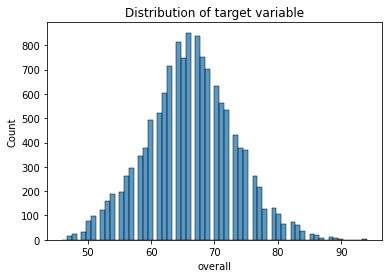

In [20]:
plt.title('Distribution of target variable')
sns.histplot(data=df_full_train.overall.values)
plt.xlabel('overall')
plt.show()

C:\Users\asus\AppData\Local\Temp/ipykernel_31104/1040898304.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_full_train.hist(bins=100,ax=ax,layout=(13,3),


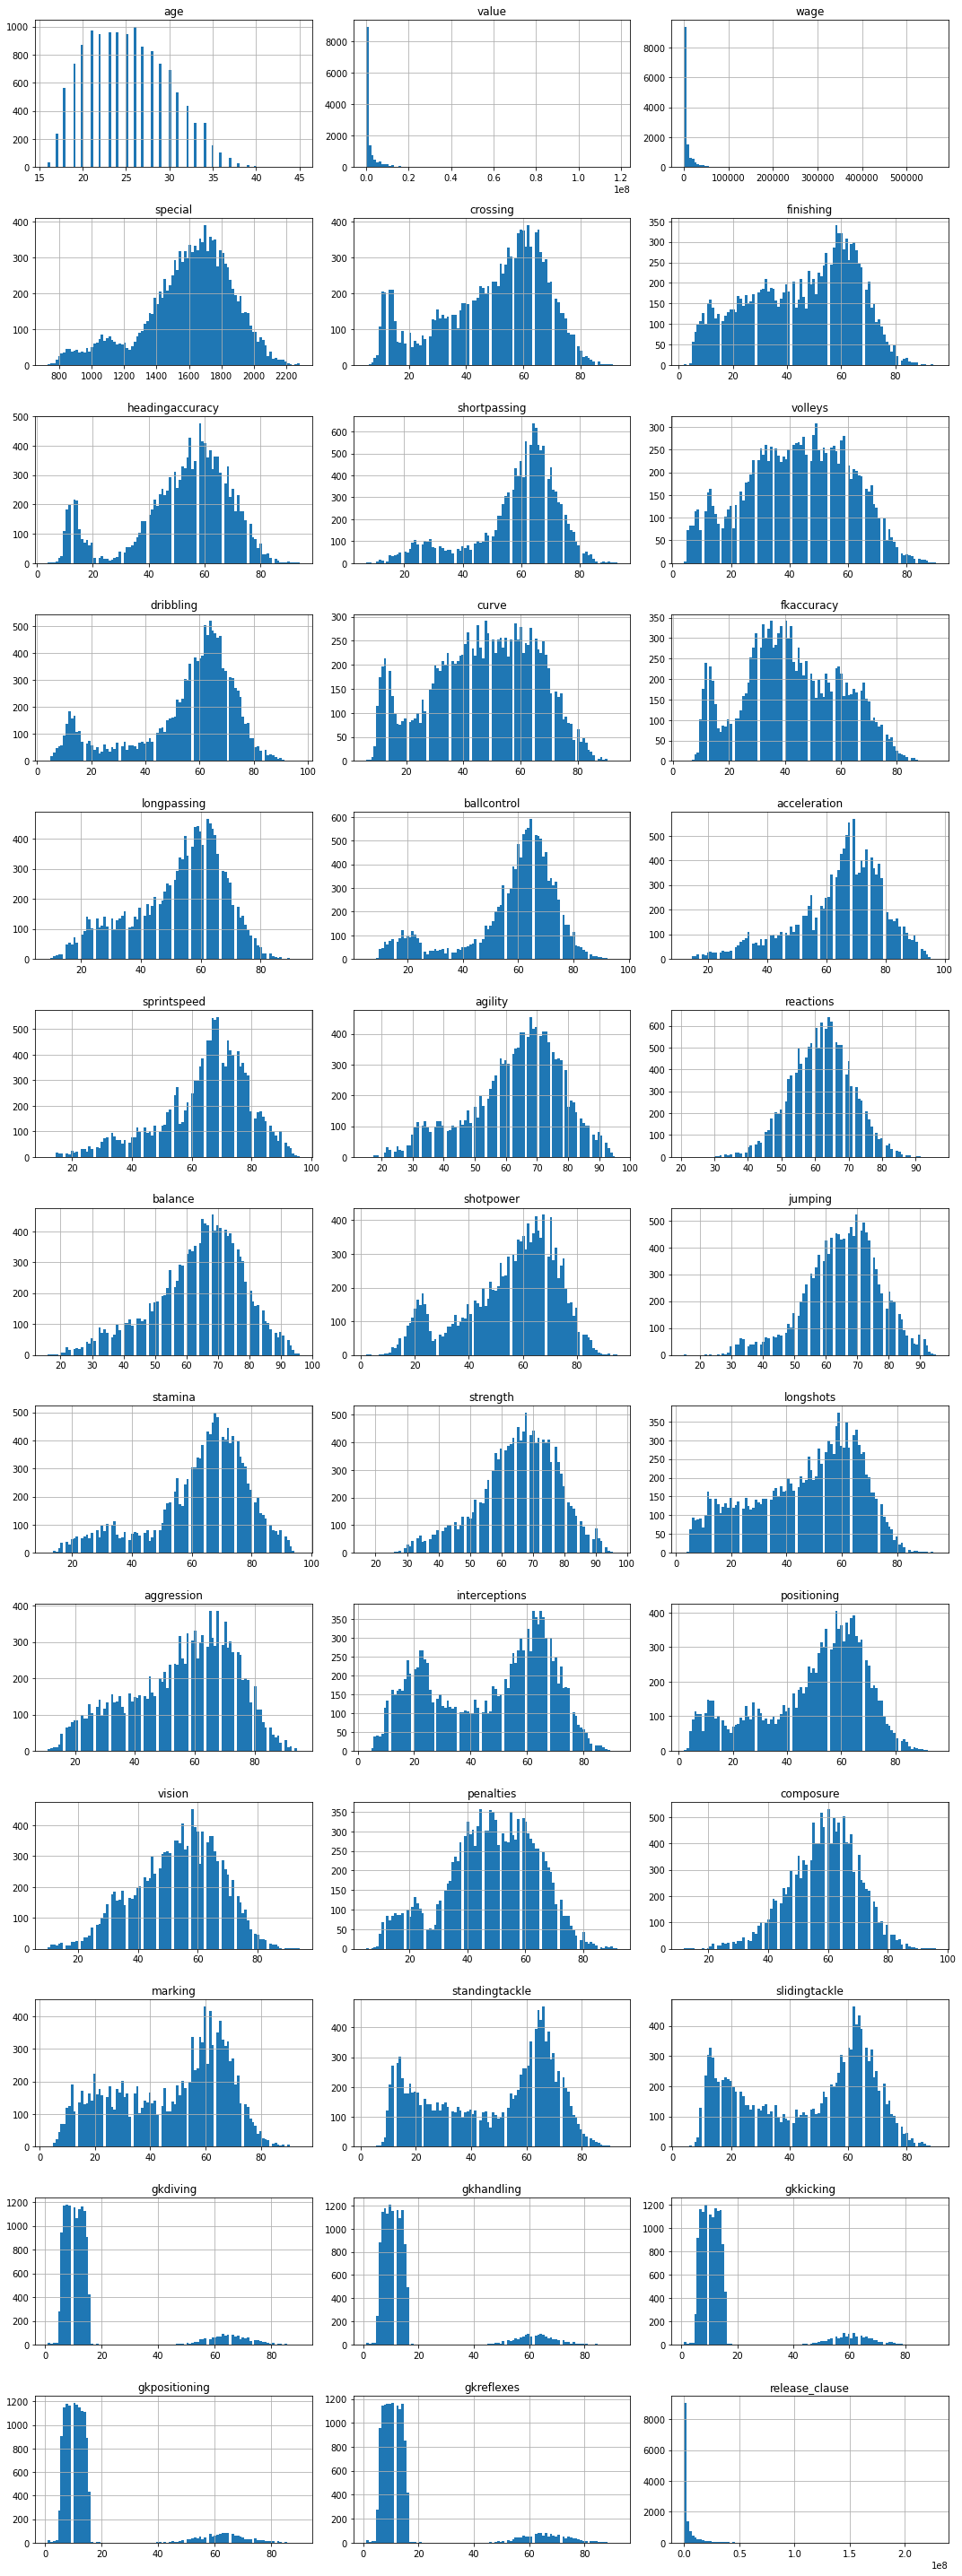

In [21]:
#for numerical feature
fig=plt.figure(figsize=(15,40))
ax=plt.gca()

df_full_train.hist(bins=100,ax=ax,layout=(13,3),
          column=numerical)

plt.tight_layout()

plt.show()

We have :

* All feature except 'age' , 'special','value','wage','release_clause' have roughly the same range of value.
* Feature that related to goalkeeping skills have different type distribution compare to another feature .

## Correlation coefficient
<a id='correlation-coefficient'></a>

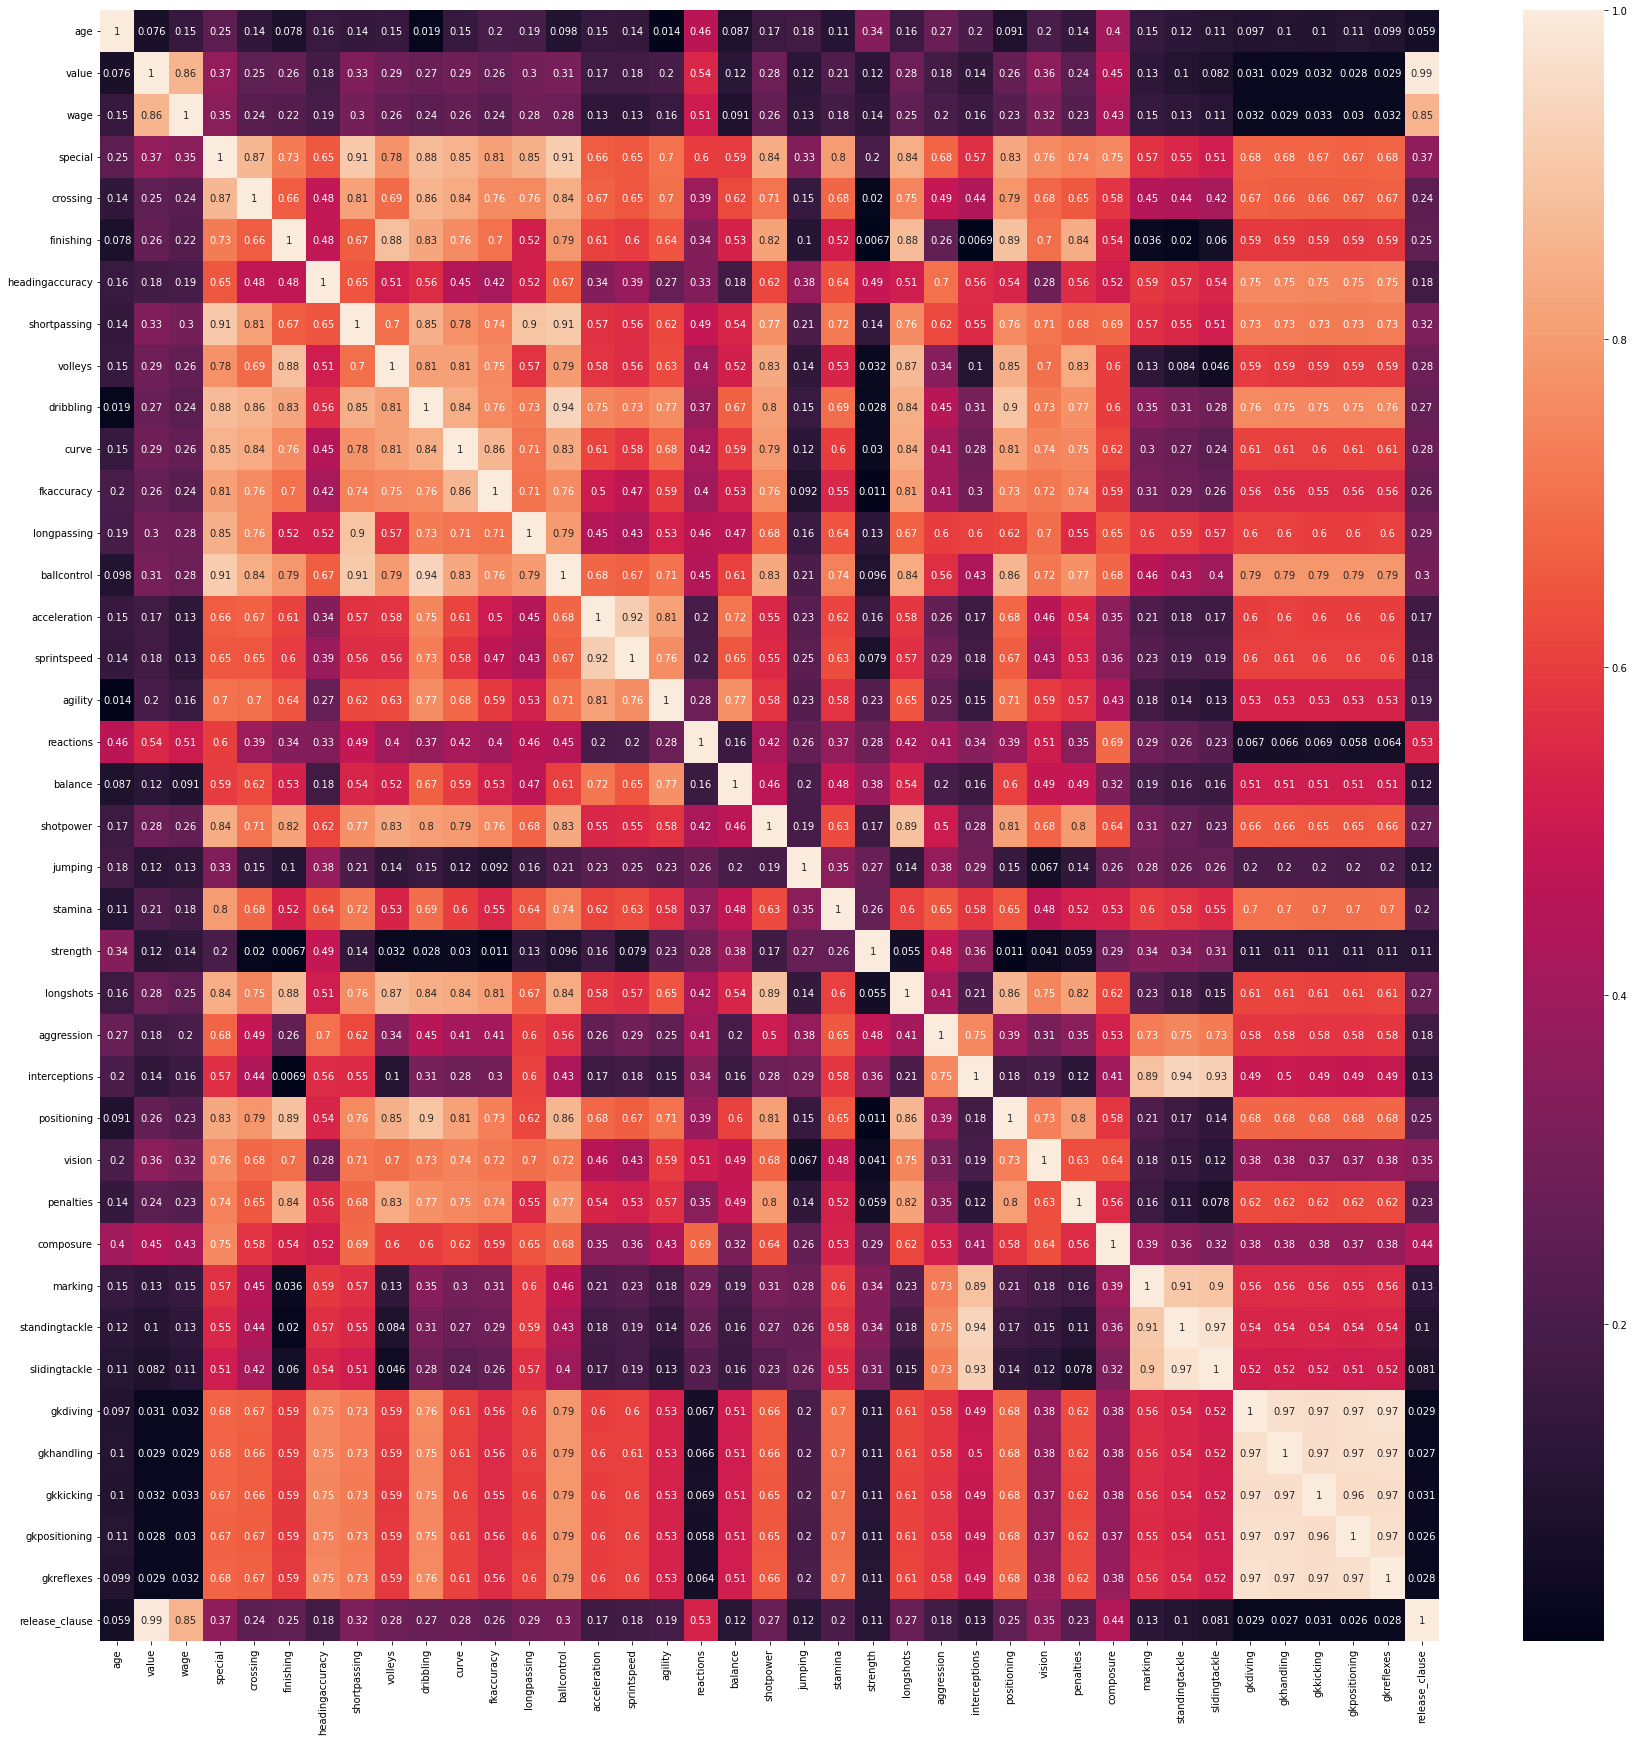

In [22]:
cor=df_full_train[numerical].corr().abs()

plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True)
plt.show()

In [23]:
#will be used on making model with subset of numerical features 

# I take this function from https://www.youtube.com/watch?v=FndwYNcVe0U&t=629s

#This function return feature that will be dropped based on threshold
def drop_feature(dataset,threshold):
    corr_matrix=dataset.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return to_drop

In [24]:
#transform value,wage,and release value

df_full_train['value']=df_full_train['value'].apply(np.log1p)
df_full_train['wage']=df_full_train['wage'].apply(np.log1p)
df_full_train['release_clause']=df_full_train['release_clause'].apply(np.log1p)

df_test['value']=df_test['value'].apply(np.log1p)
df_test['wage']=df_test['wage'].apply(np.log1p)
df_test['release_clause']=df_test['release_clause'].apply(np.log1p)

# Making model using all feature 
<a id='making-model-all-feature'></a>

* Ridge regression
* Decision tree regressor
* Random forest regressor
* XGboost

## Ridge regression
<a id='ridge-regression-allfeature'></a>

* Regression baseline
* Tuning parameter alpha
* Model performance on full training set
* Model performance on test set

### Regression Baseline

In [25]:
pd.DataFrame({'target':df_full_train.overall}).describe()

,target
count,13314.000000
mean,66.168619
std,6.996573
min,46.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,94.000000


In [26]:
#predict with mean of training
y_test=df_test.overall.values

mean_target_train=df_full_train.overall.mean()
median_target_train=np.median(df_full_train.overall.values)
per1_target_train=62
per3_target_train=71

y_pred=( np.ones(len(df_test))*mean_target_train ).round()
print( f'mean prediction rmse : {mean_squared_error(y_test,y_pred,squared=False)}' )

y_pred=( np.ones(len(df_test))*median_target_train ).round()
print( f'median prediction rmse : {mean_squared_error(y_test,y_pred,squared=False)}' )

y_pred=( np.ones(len(df_test))*per1_target_train ).round()
print( f'25% quantile prediction rmse : {mean_squared_error(y_test,y_pred,squared=False)}' )

y_pred=(np.ones(len(df_test))*per3_target_train ).round()
print( f'75% quantile prediction rmse : {mean_squared_error(y_test,y_pred,squared=False)}' )


mean prediction rmse : 7.056013288010217
median prediction rmse : 7.056013288010217
25% quantile prediction rmse : 8.179387084923325
75% quantile prediction rmse : 8.567001316974016


### Tuning parameter alpha ridge regression
<a id='5.1.1'></a>

* Make function train to receive dataframe df_train  , array y_train , and alpha .This function return model , scaler ,ohe that will be used to make prediction in function predict . The scaller that used is MinMaxScaler().
* Apply k-fold cross validation with k=5

In [27]:
def train(df_train,y_train,a):
    
    scaler = MinMaxScaler()
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    X_train_cat = ohe.fit_transform(df_train[categorical].values)
    X_train_num = df_train[numerical].values
    X_train_num = scaler.fit_transform(X_train_num)
    X_train = np.column_stack([X_train_num, X_train_cat])
    
    model=Ridge(alpha=a,random_state=1)
    model.fit(X_train,y_train)
    
    return model,scaler,ohe

def predict(df,scaler,ohe,model):
    
    X_cat = ohe.transform(df[categorical].values)
    X_num = df[numerical].values
    X_num = scaler.transform(X_num)
    X= np.column_stack([X_num, X_cat])
    
    y_pred=model.predict(X)
    return y_pred.round()

kfold=KFold(n_splits=5,shuffle=True,random_state=1)
list_alpha=[0, 1e-5 ,0.001 ,0.1 , 1 , 5 , 10 , 15 , 20, 30 , 40 ,50  ]

df_1=[]
for al in list_alpha:
    scores_train=[]
    scores_val=[]
    for train_idx,val_idx in kfold.split(df_full_train):   
        
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]
        
        y_train=df_train.overall.values
        y_val=df_val.overall.values
        
        model,scaler,ohe=train(df_train,y_train,al)
        
        y_pred_val=predict(df_val,scaler,ohe,model)
        rmse_al_fold=mean_squared_error(y_val,y_pred_val,squared=False)
        scores_val.append(rmse_al_fold)
        
        y_pred_train=predict(df_train,scaler,ohe,model)
        rmse_al_fold=mean_squared_error(y_train,y_pred_train,squared=False)
        scores_train.append(rmse_al_fold)
    
    df_1.append((al,np.mean(scores_train),np.std(scores_train),np.mean(scores_val),np.std(scores_val) ))
        
    print('%s train :%.3f +- %.3f val:%.3f +- %.3f'%(al,np.mean(scores_train),np.std(scores_train),np.mean(scores_val),np.std(scores_val) ))

0 train :1.022 +- 0.006 val:1068112894480.927 +- 1705757352555.149
1e-05 train :1.020 +- 0.005 val:1.028 +- 0.016
0.001 train :1.020 +- 0.005 val:1.028 +- 0.016
0.1 train :1.021 +- 0.006 val:1.028 +- 0.017
1 train :1.034 +- 0.004 val:1.042 +- 0.015
5 train :1.064 +- 0.004 val:1.070 +- 0.016
10 train :1.096 +- 0.004 val:1.101 +- 0.018
15 train :1.127 +- 0.003 val:1.133 +- 0.017
20 train :1.160 +- 0.003 val:1.164 +- 0.019
30 train :1.217 +- 0.003 val:1.222 +- 0.022
40 train :1.276 +- 0.004 val:1.283 +- 0.024
50 train :1.326 +- 0.003 val:1.332 +- 0.023


In [28]:
df_1=pd.DataFrame(df_1,columns=['alpha','mean_rmse_train','std_rmse_train','mean_rmse_val','std_rmse_val'])
df_1.sort_values(by='mean_rmse_val')

,alpha,mean_rmse_train,std_rmse_train,mean_rmse_val,std_rmse_val
2,0.00100,1.020109,0.005444,1.027548e+00,1.575337e-02
1,0.00001,1.020211,0.005372,1.027658e+00,1.576205e-02
3,0.10000,1.021165,0.005777,1.028263e+00,1.676430e-02
4,1.00000,1.033838,0.003959,1.041786e+00,1.514049e-02
5,5.00000,1.064038,0.003812,1.070465e+00,1.625488e-02
6,10.00000,1.095943,0.003585,1.100850e+00,1.757587e-02
7,15.00000,1.126805,0.002809,1.133262e+00,1.743695e-02
8,20.00000,1.159679,0.002503,1.164420e+00,1.911674e-02
9,30.00000,1.216898,0.002691,1.221973e+00,2.166522e-02
10,40.00000,1.276074,0.003738,1.282565e+00,2.420098e-02


### Performance of ridge regression on training set
<a id='5.1.2'></a>

* After the process in tuning parameter alpha ,i choose alpha= 0.001 for Ridge Regression

In [40]:
model,scaler,ohe=train(df_full_train,df_full_train.overall.values,0.001)
y_pred=predict(df_full_train,scaler,ohe,model)
r2 = r2_score(df_full_train.overall.values,y_pred)

print(f'rmse on full training  is {mean_squared_error(df_full_train.overall.values,y_pred)} ')
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'train data':df_full_train.overall.values,'pred':y_pred})

rmse on full training  is 1.0444644734865556 
R2 score : 0.9786619102492762
adjusted R2 score : 0.957629550623186


,train data,pred
0,49,51.0
1,63,63.0
2,54,55.0
3,65,66.0
4,59,58.0
...,...,...
13309,77,76.0
13310,69,68.0
13311,60,61.0
13312,82,82.0


### Performance of ridge regression on test set
<a id='5.1.3'></a>

In [41]:
y_pred=predict(df_test,scaler,ohe,model)
r2 = r2_score(df_test.overall.values,y_pred)
print(f'rmse on test is {mean_squared_error(df_test.overall.values,y_pred)} ')
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test is 1.0108140582757585 
R2 score : 0.9796894357339804
adjusted R2 score : 0.9592154061403869


,test data,pred
0,51,52.0
1,70,71.0
2,62,62.0
3,70,67.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,59.0
3326,74,75.0
3327,76,76.0


## Decision tree regressor
<a id='decision-tree-all-feature'></a>

* Find best range of max_depth
* Tuning max_depth and min_samples_leaf
* Model performance on full training set
* Model performance on test set

### Find best range of max_depth

* Make function train to receive dataframe df_train  , array y_train , and max_depth md .This function return model ,ohe that will be used to make prediction in function predict . 
* Apply k-fold cross validation with k=5

In [23]:
def train(df_train,y_train,md):
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_cat = ohe.fit_transform(df_train[categorical].values)
    X_train_num = df_train[numerical].values
    X_train = np.column_stack([X_train_num, X_train_cat])
    
    model=DecisionTreeRegressor(max_depth=md,random_state=1)
    model.fit(X_train,y_train)
    
    return model,ohe

def predict(df,ohe,model):
    X_cat = ohe.transform(df[categorical].values)
    X_num = df[numerical].values
    X= np.column_stack([X_num, X_cat])
    
    y_pred=model.predict(X)
    return y_pred.round()

max_depth=np.arange(5,101)


kfold=KFold(n_splits=5,shuffle=True,random_state=1)

df_dummy=[]
for md in max_depth:
    scores_val=[]
    scores_train=[]
    for train_idx,val_idx in kfold.split(df_full_train):
        
        df_train=df_full_train.iloc[train_idx]
        y_train=df_full_train.iloc[train_idx].overall.values
        
        df_val=df_full_train.iloc[val_idx]
        y_val=df_full_train.iloc[val_idx].overall.values
        
        model,ohe=train(df_train,y_train,md)
        
        y_pred_val=predict(df_val,ohe,model)
        rmse_md_val=mean_squared_error(y_val,y_pred_val,squared=False)
        scores_val.append(rmse_md_val)
        
        y_pred_train=predict(df_train,ohe,model)
        rmse_md_train=mean_squared_error(y_train,y_pred_train,squared=False)
        scores_train.append(rmse_md_train)
        
    df_dummy.append(( md,np.mean(scores_train),np.std(scores_train),np.mean(scores_val),np.std(scores_val) ))

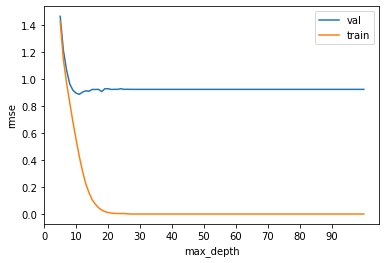

In [24]:
df_dummy=pd.DataFrame(df_dummy,columns=['md','mean_rmse_train','std_rmse_train','mean_rmse_val','std_rmse_val'])

plt.plot(df_dummy.md,df_dummy['mean_rmse_val'],label='val')
plt.plot(df_dummy.md,df_dummy['mean_rmse_train'],label='train')

plt.xticks(np.arange(0, len(df_dummy)+1, 10))
plt.legend()
plt.ylabel('rmse')
plt.xlabel('max_depth')
plt.show()

In [25]:
df_dummy.sort_values(by='mean_rmse_val')

,md,mean_rmse_train,std_rmse_train,mean_rmse_val,std_rmse_val
6,11,0.423773,0.014435,0.886386,0.031792
5,10,0.548533,0.008533,0.894782,0.020059
7,12,0.316429,0.012740,0.903093,0.042750
13,18,0.029036,0.007629,0.906777,0.023878
9,14,0.159130,0.013312,0.909149,0.026356
...,...,...,...,...,...
14,19,0.017911,0.005996,0.928054,0.020972
3,8,0.823360,0.007002,0.962453,0.021266
2,7,0.970150,0.008591,1.065691,0.026514
1,6,1.143775,0.004985,1.211608,0.023247


### Find best max Depth and min_sample_leafs
<a id='5.2.1'></a>

* Based on previous cell the best max_depth in range [10,15]
* Make function train to receive dataframe df_train  , array y_train ,max_depth md, and min_samples_leaf msl .This function return model ohe that will be used to make prediction in function predict . 
* Apply k-fold cross validation with k=5

In [26]:
def train(df_train,y_train,md,msl):
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_cat = ohe.fit_transform(df_train[categorical].values)
    X_train_num = df_train[numerical].values
    X_train = np.column_stack([X_train_num, X_train_cat])
    
    model=DecisionTreeRegressor(max_depth=md,min_samples_leaf=msl,random_state=1)
    model.fit(X_train,y_train)
    
    return model,ohe

def predict(df,ohe,model):
    X_cat = ohe.transform(df[categorical].values)
    X_num = df[numerical].values
    X= np.column_stack([X_num, X_cat])
    
    y_pred=model.predict(X)
    return y_pred.round()

max_depth=np.arange(10,16)
min_sample_leaf=np.arange(1,501,10)


kfold=KFold(n_splits=5,shuffle=True,random_state=1)

dummy=[]
for md in max_depth:
    for msl in min_sample_leaf:
        scores_val=[]
        scores_train=[]
        for train_idx,val_idx in kfold.split(df_full_train):
            df_train=df_full_train.iloc[train_idx]
            y_train=df_full_train.iloc[train_idx].overall.values

            df_val=df_full_train.iloc[val_idx]
            y_val=df_full_train.iloc[val_idx].overall.values
            
            model,ohe=train(df_train,y_train,md,msl)
            
            y_pred_val=predict(df_val,ohe,model)
            rmse_md_msl_val=mean_squared_error(y_val,y_pred_val,squared=False)
            scores_val.append(rmse_md_msl_val)
            
            y_pred_train=predict(df_train,ohe,model)
            rmse_md_msl_train=mean_squared_error(y_train,y_pred_train,squared=False)
            scores_train.append(rmse_md_msl_train)

        dummy.append((md,msl,np.mean(scores_train),np.std(scores_train),np.mean(scores_val),np.std(scores_val)))

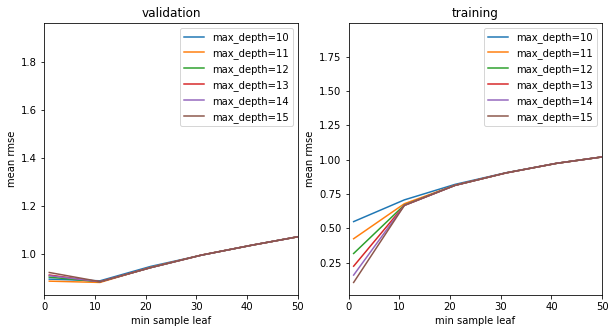

In [27]:
df_dummy=pd.DataFrame(dummy,columns=['md','msl','rmse_mean_train','rmse_std_train','rmse_mean_val','rmse_std_val'])
fig,ax=plt.subplots(1,2,figsize=(10,5))

for md in max_depth:
    df_subset=df_dummy[df_dummy.md==md]
    ax[0].plot(df_subset.msl,df_subset.rmse_mean_val,
             label='max_depth=%d'%md)
    ax[0].set_title('validation')
    ax[0].set_xlim(0,50)
    ax[0].set_xlabel('min sample leaf')
    ax[0].set_ylabel('mean rmse')
    ax[0].legend()
    ax[1].plot(df_subset.msl,df_subset.rmse_mean_train,
             label='max_depth=%d'%md)
    ax[1].set_title('training')
    ax[1].set_xlim(0,50)
    ax[1].set_xlabel('min sample leaf')
    ax[1].set_ylabel('mean rmse')
    ax[1].legend()
    plt.legend()


In [28]:
df_dummy.sort_values(by='rmse_mean_val',ascending=True)

,md,msl,rmse_mean_train,rmse_std_train,rmse_mean_val,rmse_std_val
51,11,11,0.678784,0.002748,0.880989,0.021967
151,13,11,0.666872,0.001483,0.883785,0.018838
101,12,11,0.669443,0.001225,0.883786,0.018815
201,14,11,0.666505,0.001465,0.884375,0.019083
251,15,11,0.666421,0.001525,0.884437,0.020107
...,...,...,...,...,...,...
199,13,491,1.904732,0.012298,1.911762,0.041033
99,11,491,1.904732,0.012298,1.911762,0.041033
49,10,491,1.904732,0.012298,1.911762,0.041033
249,14,491,1.904732,0.012298,1.911762,0.041033


### Performance of decision tree regressor on full training set
<a id='5.2.2'></a>

* Based on previous cell , i choose max_depth=11 and min_samples_leaf=11

In [29]:
model,ohe=train(df_full_train,df_full_train.overall.values,md=11,msl=11)

In [30]:
y_pred=predict(df_full_train,ohe,model)
print(f'rmse on full training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'train data':df_full_train.overall.values,'pred':y_pred})

rmse on full training set : 0.4197836863452005
R2 score : 0.9914239476760538
adjusted R2 score : 0.9828609365530244


,train data,pred
0,49,49.0
1,63,63.0
2,54,54.0
3,65,65.0
4,59,58.0
...,...,...
13309,77,77.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of decision tree regressor on test set
<a id='5.2.3'></a>

In [31]:
y_pred=predict(df_test,ohe,model)
print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.706518474016221
R2 score : 0.9858037304149545
adjusted R2 score : 0.971405161544448


,test data,pred
0,51,52.0
1,70,70.0
2,62,61.0
3,70,73.0
4,63,64.0
...,...,...
3324,63,62.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


After this cell , i try to build machine learning model using pipeline and search best parameter using GridSearchCV

* I followed this tutorial on https://medium.com/analytics-vidhya/how-to-apply-preprocessing-steps-in-a-pipeline-only-to-specific-features-4e91fe45dfb8

* I make 4 functions ,for ridge,decision tree,random forest,and xgboost
* For example, on function ridge_pipeline.There is 2 stage in 'pipeline'.First is step named 'preprocessing'.This step consist of apply OneHotEncoder to categorical variable 'cat' and apply MinMaxScaler to numerical variable 'num' . The second step is named 'ridge' , that is the model that  will used.The list of  parameter that we want to check is also defined , where GridSearchCV will find the best parameter from possible parameter combination of that dict. The scoring that will be used is 'neg_mean_squared_error'.It is negative of mean squared error,because GridSearchCV try to maximize score.The 5 fold cross validation(defined with cv=5) is also applied.


In [229]:
def ridge_pipeline(df_full_train,y_train,cat,num,list_alpha):
    categorical_transformer = Pipeline(
        [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]
    )
    numeric_transformer = Pipeline(
        [
            ('scaler', MinMaxScaler())
        ]
    )

    preprocessor = ColumnTransformer(
        [
            ('categoricals', categorical_transformer, cat),  #apply categorical_transformer to categorical feature
            ('numericals', numeric_transformer,num)          #apply numerical_transformer to numerical feature
        ],
        remainder='drop' #this line meaning column that is not categorical and numerical is dropped
    )

    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('ridge', Ridge())
        ]
    )
    
    param_grid=[{
    'ridge__alpha':list_alpha,
    'ridge__random_state':[1]
    }]
    
    cv_ridge = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error' ,cv = 5 ,n_jobs = -1,verbose=2,return_train_score=True)
    cv_ridge.fit(df_full_train,y_train)
    
    return cv_ridge

def dt_pipeline(df_full_train,y_train,cat,num,list_md,list_msl):
    categorical_transformer = Pipeline(
        [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]
    )
    
    preprocessor = ColumnTransformer(
        [
            ('categoricals', categorical_transformer, cat)
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('dt', DecisionTreeRegressor())
        ]
    )
    
    param_grid=[{
    'dt__max_depth':list_md,
    'dt__min_samples_leaf':list_msl,
    'dt__random_state':[1]
    }]
    
    cv_dt = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error' ,cv = 5 ,n_jobs = -1,verbose=2,return_train_score=True)
    cv_dt.fit(df_full_train,y_train)
    
    return cv_dt
    


def rf_pipeline(df_full_train,y_train,cat,num,list_md,list_msl):
    categorical_transformer = Pipeline(
        [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]
    )
    
    preprocessor = ColumnTransformer(
        [
            ('categoricals', categorical_transformer, cat)
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('rf', RandomForestRegressor())
        ]
    )
    
    param_grid=[{
    'rf__max_depth':list_md,
    'rf__min_samples_leaf':list_msl,
    'rf__random_state':[1],
    'rf__n_estimators':[10]
    }]
    
    cv_rf = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error' ,cv = 5 ,n_jobs = -1,verbose=2,return_train_score=True)
    cv_rf.fit(df_full_train,y_train)
    
    return cv_rf


def XG_pipeline(df_full_train,y_train,cat,num,list_md,list_eta):
    categorical_transformer = Pipeline(
        [
            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
        ]
    )
    
    preprocessor = ColumnTransformer(
        [
            ('categoricals', categorical_transformer, cat)
        ],
        remainder='passthrough'
    )

    pipeline = Pipeline(
        [
            ('preprocessing', preprocessor),
            ('xg', xgb.XGBRegressor())
        ]
    )
    
    xgb_params={
    'xg__eta':list_eta,
    'xg__max_depth':list_md,
    'xg__min_child_weight':[50],
    
    'xg__objective':['reg:squarederror'],
    'xg__nthread':[2],
    'xg__n_estimators':[10],
    
    'xg__seed':[1],
    'xg__verbosity':[1]
    }
    
    
    cv_xg = GridSearchCV(pipeline, xgb_params, scoring='neg_mean_squared_error' ,cv = 5 ,n_jobs = -1,verbose=2,return_train_score=True)
    cv_xg.fit(df_full_train,y_train)
    
    return cv_xg
    


## Random forest regressor
<a id='random-forest-all-feature'></a>

* Tuning max_depth
* Model performance on full training set
* Model performance on test set

### Tuning max_depth and min_samples_leaf
<a id='5.3.1'></a>


In [88]:
list_md=list(range(5,20))
list_msl=list(range(50,200,10))
cv_rf=rf_pipeline(df_full_train[categorical+numerical],df_full_train['overall'],categorical,numerical,list_md,list_msl)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


In [89]:
print('best parameters from search in forest_params')
cv_rf.best_params_

best parameters from search in forest_params


{'rf__max_depth': 10,
 'rf__min_samples_leaf': 50,
 'rf__n_estimators': 10,
 'rf__random_state': 1}

### Performance of random forest regressor on full training set
<a id='5.3.2'></a>

In [91]:
y_pred=cv_rf.predict(df_full_train[categorical+numerical]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})


rmse on training set : 0.8963497070752591
R2 score : 0.9816878496271294
adjusted R2 score : 0.9635824662330033


,full train data,pred
0,49,50.0
1,63,65.0
2,54,54.0
3,65,64.0
4,59,57.0
...,...,...
13309,77,80.0
13310,69,69.0
13311,60,61.0
13312,82,82.0


### Performance of random forest regressor on test set
<a id='5.3.3'></a>

In [92]:
y_pred=cv_rf.predict(df_test[categorical+numerical]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})


rmse on test set : 1.0027035145689396
R2 score : 0.979852403114421
adjusted R2 score : 0.9595393220746553


,test data,pred
0,51,51.0
1,70,70.0
2,62,61.0
3,70,68.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,61.0
3326,74,75.0
3327,76,77.0


## XGboost
<a id='xgboost-all-feature'></a>

* Tuning eta and max_depth
* Xgboost performance on full training set
* Xgboost performance on test set

### Tuning eta and max_depth
<a id='5.4.1'></a>

In [97]:
list_md=list(range(5,20))
list_eta=[i*0.1 for i in range(1,11)]
cv_xg=XG_pipeline(df_full_train[categorical+numerical],df_full_train['overall'],categorical,numerical,list_md,list_eta)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [98]:
print('best parameters from search in xgb_params')
print(cv_xg.best_params_)

best parameters from search in xgb_params
{'xg__eta': 0.6000000000000001, 'xg__max_depth': 6, 'xg__min_child_weight': 50, 'xg__n_estimators': 10, 'xg__nthread': 2, 'xg__objective': 'reg:squarederror', 'xg__seed': 1, 'xg__verbosity': 1}


### Performance of XGboost on full training set
<a id='5.4.2'></a>

In [99]:
y_pred=cv_xg.predict(df_full_train[categorical+numerical]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on training set : 0.6371488658554905
R2 score : 0.9869832435383726
adjusted R2 score : 0.9740442894044049


,full train data,pred
0,49,49.0
1,63,66.0
2,54,52.0
3,65,64.0
4,59,58.0
...,...,...
13309,77,77.0
13310,69,69.0
13311,60,61.0
13312,82,83.0


### Performance of XGboost on test set
<a id='5.4.3'></a>

In [100]:
y_pred=cv_xg.predict(df_test[categorical+numerical]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.7014118353860018
R2 score : 0.985906339506343
adjusted R2 score : 0.9716103750709645


,test data,pred
0,51,51.0
1,70,70.0
2,62,61.0
3,70,69.0
4,63,65.0
...,...,...
3324,63,63.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


# Making model using subset of features (threshold = 0.9)
<a id='making-model-th1-feature'></a>

* For categorical variable , will use 3 feature that have highest mutual information
* For numerical variable , will drop feature according correlation coefficient with function drop_feature(dataset,threshold)

list of model will be used:
* Ridge regression
* Decision tree regressor
* Random forest regressor
* XGboost

In [230]:
#Using threshold 0.9

to_drop=drop_feature(df_full_train[numerical],threshold=0.9)
numerical_th1=numerical.copy()

for num in to_drop:
    numerical_th1.remove(num)

categorical_th1=list(mi.sort_values(ascending=False).index[:3])

print('categorical variable that will be used')
print(categorical_th1)

print('numerical variable that will be used')
print(numerical_th1)

categorical variable that will be used
['skill_moves', 'international_reputation', 'position']
numerical variable that will be used
['age', 'value', 'wage', 'special', 'crossing', 'finishing', 'headingaccuracy', 'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'acceleration', 'agility', 'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength', 'longshots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'gkdiving']


## Ridge regression
<a id='ridge-th1-feature'></a>

### Tuning parameter alpha
<a id='6.1.1'></a>

In [231]:
list_alpha=[0, 1e-5 ,0.001 ,0.1 , 1 , 5 , 10 , 15 , 20, 30 , 40 ,50  ]
cv_ridge=ridge_pipeline(df_full_train[numerical_th1+categorical_th1],df_full_train['overall'],categorical_th1,numerical_th1,list_alpha)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [232]:
print('best parameters from search ')
print(cv_ridge.best_params_)

best parameters from search 
{'ridge__alpha': 1e-05, 'ridge__random_state': 1}


### Performance of ridge regression on full training set
<a id='6.1.2'></a>

In [233]:
y_pred=cv_ridge.predict(df_full_train[numerical_th1+categorical_th1]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on training set : 1.0796905512993842
R2 score : 0.9779422522532248
adjusted R2 score : 0.9562164760970686


,full train data,pred
0,49,51.0
1,63,64.0
2,54,55.0
3,65,66.0
4,59,58.0
...,...,...
13309,77,76.0
13310,69,69.0
13311,60,61.0
13312,82,82.0


### Performance of ridge regression on test set
<a id='6.1.3'></a>

In [234]:
y_pred=cv_ridge.predict(df_test[numerical_th1+categorical_th1]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 1.0684890357464705
R2 score : 0.9785305565841808
adjusted R2 score : 0.9569135577452771


,test data,pred
0,51,52.0
1,70,71.0
2,62,62.0
3,70,67.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


### Decision tree regressor
<a id='decision-tree-th1-feature'></a>

### Tuning max_depth
<a id='6.2.1'></a>

In [235]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_dt=dt_pipeline(df_full_train[numerical_th1+categorical_th1],df_full_train['overall'],categorical_th1,numerical_th1,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [236]:
print('best parameter from search')
print(cv_dt.best_params_)

best parameter from search
{'dt__max_depth': 13, 'dt__min_samples_leaf': 15, 'dt__random_state': 1}


### Performance of decision tree regressor on full training set

In [237]:
y_pred=cv_ridge.predict(df_full_train[numerical_th1+categorical_th1]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on training set : 1.0796905512993842
R2 score : 0.9779422522532248
adjusted R2 score : 0.9562164760970686


,full train data,pred
0,49,51.0
1,63,64.0
2,54,55.0
3,65,66.0
4,59,58.0
...,...,...
13309,77,76.0
13310,69,69.0
13311,60,61.0
13312,82,82.0


### Performance of decision tree regressor on test set

In [238]:
y_pred=cv_ridge.predict(df_test[numerical_th1+categorical_th1]).round()

print(f'rmse on training set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on training set : 1.0684890357464705
R2 score : 0.9785305565841808
adjusted R2 score : 0.9569135577452771


,test data,pred
0,51,52.0
1,70,71.0
2,62,62.0
3,70,67.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


## Random Forest Regressor
<a id='random-forest-th1-feature'></a>

### Tuning max_depth
<a id='6.3.1'></a>

In [239]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_rf=rf_pipeline(df_full_train[categorical_th1+numerical_th1],df_full_train['overall'],categorical_th1,numerical_th1,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [240]:
print('best parameter from search')
print(cv_rf.best_params_)

best parameter from search
{'rf__max_depth': 15, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 10, 'rf__random_state': 1}


### Performance of random forest regressor on full training set
<a id='6.3.2'></a>

In [241]:
y_pred=cv_rf.predict(df_full_train[categorical_th1+numerical_th1]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on training set : 0.22262280306444343
R2 score : 0.9954518842211171
adjusted R2 score : 0.9908923001229492


,full train data,pred
0,49,49.0
1,63,65.0
2,54,54.0
3,65,65.0
4,59,58.0
...,...,...
13309,77,78.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of random forest regressor on test set
<a id='6.3.3'></a>

In [242]:
y_pred=cv_rf.predict(df_test[categorical_th1+numerical_th1]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.4815259837789126
R2 score : 0.9903245662649541
adjusted R2 score : 0.9804668882996982


,test data,pred
0,51,50.0
1,70,70.0
2,62,61.0
3,70,72.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,61.0
3326,74,75.0
3327,76,76.0


## XGboost
<a id='xgboost-th1-feature'></a>

### Tuning eta and max_depth
<a id='6.4.1'></a>

In [243]:
list_md=list(range(5,20))
list_eta=[i*0.1 for i in range(1,11)]
cv_xg=XG_pipeline(df_full_train[categorical_th1+numerical_th1],df_full_train['overall'],categorical_th1,numerical_th1,list_md,list_eta)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [244]:
print('Best parameter from search')
print(cv_xg.best_params_)

Best parameter from search
{'xg__eta': 0.5, 'xg__max_depth': 11, 'xg__min_child_weight': 50, 'xg__n_estimators': 10, 'xg__nthread': 2, 'xg__objective': 'reg:squarederror', 'xg__seed': 1, 'xg__verbosity': 1}


### Performance of XGboost on full training set
<a id='6.4.2'></a>

In [245]:
y_pred=cv_xg.predict(df_full_train[categorical_th1+numerical_th1]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.5062340393570678
R2 score : 0.9896577934042946
adjusted R2 score : 0.9793496443641264


,full train data,pred
0,49,49.0
1,63,64.0
2,54,53.0
3,65,64.0
4,59,57.0
...,...,...
13309,77,77.0
13310,69,68.0
13311,60,61.0
13312,82,83.0


### Performance of XGboost on test set
<a id='6.4.3'></a>

In [246]:
y_pred=cv_xg.predict(df_test[categorical_th1+numerical_th1]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.6245118654250525
R2 score : 0.9874515117060759
adjusted R2 score : 0.9747032319311811


,test data,pred
0,51,51.0
1,70,70.0
2,62,61.0
3,70,72.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,60.0
3326,74,75.0
3327,76,75.0


# Making model using subset of features (threshold = 0.8)
<a id='making-model-th2-feature'></a>
* For categorical variable , will use 3 feature that have highest mutual information
* For numerical variable , will drop feature according correlation coefficient with function drop_feature(dataset,threshold)

list of model will be used:
* Ridge regression
* Decision tree regressor
* Random forest regressor
* XGboost

In [247]:
#Using threshold 0.8

to_drop=drop_feature(df_full_train[numerical],threshold=0.8)
numerical_th2=numerical.copy()

for num in to_drop:
    numerical_th2.remove(num)

categorical_th2=list(mi.sort_values(ascending=False).index[:3])

## Ridge regression
<a id='ridge-th2-feature'></a>

### Tuning parameter alpha
<a id='7.1.1'></a>

In [248]:
list_alpha=[0, 1e-5 ,0.001 ,0.1 , 1 , 5 , 10 , 15 , 20, 30 , 40 ,50  ]
cv_ridge=ridge_pipeline(df_full_train[numerical_th2+categorical_th2],df_full_train['overall'],categorical_th2,numerical_th2,list_alpha)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [249]:
print('best parameter from search')
print(cv_ridge.best_params_)

best parameter from search
{'ridge__alpha': 1e-05, 'ridge__random_state': 1}


### Performance of ridge regression on full training set
<a id='7.1.2'></a>

In [250]:
y_pred=cv_ridge.predict(df_full_train[numerical_th2+categorical_th2]).round()

print(f'rmse on training set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on training set : 1.1164939161784588
R2 score : 0.9771903707648131
adjusted R2 score : 0.9547412399204802


,full train data,pred
0,49,51.0
1,63,64.0
2,54,55.0
3,65,66.0
4,59,58.0
...,...,...
13309,77,76.0
13310,69,68.0
13311,60,61.0
13312,82,82.0


### Performance of ridge regression on test set
<a id='7.1.3'></a>

In [251]:
y_pred=cv_ridge.predict(df_test[numerical_th2+categorical_th2]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 1.1162511264644037
R2 score : 0.977570859788253
adjusted R2 score : 0.9550094018588772


,test data,pred
0,51,52.0
1,70,70.0
2,62,62.0
3,70,67.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


## Decision tree regressor
<a id='decision-tree-th2-feature'></a>

### Tuning max_depth  and min_samples_leaf
<a id='7.2.1'></a>

In [252]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_dt=dt_pipeline(df_full_train[numerical_th2+categorical_th2],df_full_train['overall'],categorical_th2,numerical_th2,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [253]:
print('best parameter from search')
print(cv_dt.best_params_)

best parameter from search
{'dt__max_depth': 11, 'dt__min_samples_leaf': 15, 'dt__random_state': 1}


### Performance of decision tree regressor on full training set
<a id='7.2.2'></a>

In [254]:
y_pred=cv_dt.predict(df_full_train[numerical_th2+categorical_th2]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.5274147513895148
R2 score : 0.9892250779354536
adjusted R2 score : 0.978490317380581


,full train data,pred
0,49,50.0
1,63,64.0
2,54,54.0
3,65,65.0
4,59,58.0
...,...,...
13309,77,77.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of decision tree regressor on test set
<a id='7.2.3'></a>

In [255]:
y_pred=cv_dt.predict(df_test[numerical_th2+categorical_th2]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.7461700210273355
R2 score : 0.9850070009994673
adjusted R2 score : 0.9698124656616233


,test data,pred
0,51,49.0
1,70,70.0
2,62,60.0
3,70,72.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,61.0
3326,74,75.0
3327,76,76.0


In [1]:
df_test[0]

NameError: name 'df_test' is not defined

## Random forest regressor
<a id='random-forest-th2-feature'></a>

### Tuning max_depth and min_samples_leaf
<a id='7.3.1'></a>

In [256]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_rf=rf_pipeline(df_full_train[categorical_th2+numerical_th2],df_full_train['overall'],categorical_th2,numerical_th2,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [257]:
print('Best parameter from search')
print(cv_rf.best_params_)

Best parameter from search
{'rf__max_depth': 13, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 10, 'rf__random_state': 1}


### Performance of random forest regressor on full training set
<a id='7.3.2'></a>

In [258]:
y_pred=cv_rf.predict(df_full_train[categorical_th2+numerical_th2]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.2480096139402133
R2 score : 0.9949332394393147
adjusted R2 score : 0.989856339927658


,full train data,pred
0,49,49.0
1,63,64.0
2,54,54.0
3,65,65.0
4,59,57.0
...,...,...
13309,77,78.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of random forest regressor on test set
<a id='7.3.3'></a>

In [259]:
y_pred=cv_rf.predict(df_test[categorical_th2+numerical_th2]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.47041153499549415
R2 score : 0.9905478919344468
adjusted R2 score : 0.980915605012528


,test data,pred
0,51,50.0
1,70,70.0
2,62,61.0
3,70,70.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,61.0
3326,74,75.0
3327,76,76.0


## XGboost
<a id='xgboost-th2-feature'></a>

### Tuning eta and max_depth
<a id='7.4.1'></a>

In [260]:
list_md=list(range(5,20))
list_eta=[i*0.1 for i in range(1,11)]
cv_xg=XG_pipeline(df_full_train[categorical_th2+numerical_th2],df_full_train['overall'],categorical_th2,numerical_th2,list_md,list_eta)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [261]:
print('best parameter from search')
print(cv_xg.best_params_)

best parameter from search
{'xg__eta': 0.5, 'xg__max_depth': 19, 'xg__min_child_weight': 50, 'xg__n_estimators': 10, 'xg__nthread': 2, 'xg__objective': 'reg:squarederror', 'xg__seed': 1, 'xg__verbosity': 1}


### Performance of XGboost on full training set
<a id='7.4.2'></a>

In [262]:
y_pred=cv_xg.predict(df_full_train[categorical_th2+numerical_th2]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.4385609133243203
R2 score : 0.9910403346717621
adjusted R2 score : 0.9820977431079704


,full train data,pred
0,49,49.0
1,63,64.0
2,54,53.0
3,65,64.0
4,59,57.0
...,...,...
13309,77,77.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of XGboost on test set
<a id='7.4.3'></a>

In [263]:
y_pred=cv_xg.predict(df_test[categorical_th2+numerical_th2]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.5791528987683989
R2 score : 0.988362921870762
adjusted R2 score : 0.9765298052467579


,test data,pred
0,51,51.0
1,70,70.0
2,62,62.0
3,70,72.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,61.0
3326,74,75.0
3327,76,75.0


# Making model using subset of features (threshold = 0.7)
<a id='making-model-th3-feature'></a>

* For categorical variable , will use 3 feature that have highest mutual information
* For numerical variable , will drop feature according correlation coefficient with function drop_feature(dataset,threshold)

list of model will be used:
* Ridge regression
* Decision tree regressor
* Random forest regressor
* XGboost

In [265]:
#Using threshold 0.7

to_drop=drop_feature(df_full_train[numerical],threshold=0.7)
numerical_th3=numerical.copy()

for num in to_drop:
    numerical_th3.remove(num)

categorical_th3=list(mi.sort_values(ascending=False).index[:3])

## Ridge Regression
<a id='ridge-th3-feature'></a>

### Tuning alpha
<a id='8.1.1'></a>

In [266]:
list_alpha=[0, 1e-5 ,0.001 ,0.1 , 1 , 5 , 10 , 15 , 20, 30 , 40 ,50  ]
cv_ridge=ridge_pipeline(df_full_train[numerical_th3+categorical_th3],df_full_train['overall'],categorical_th3,numerical_th3,list_alpha)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [267]:
print('best parameter from search')
print(cv_ridge.best_params_)

best parameter from search
{'ridge__alpha': 0, 'ridge__random_state': 1}


### Performance of ridge regression on full training set
<a id='8.1.2'></a>

In [268]:
y_pred=cv_ridge.predict(df_full_train[numerical_th3+categorical_th3]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 1.1929547844374342
R2 score : 0.975628298611337
adjusted R2 score : 0.9516799888650174


,full train data,pred
0,49,52.0
1,63,63.0
2,54,55.0
3,65,66.0
4,59,58.0
...,...,...
13309,77,76.0
13310,69,68.0
13311,60,61.0
13312,82,82.0


### Performance of ridge regression on test set
<a id='8.1.3'></a>

In [269]:
y_pred=cv_ridge.predict(df_test[numerical_th3+categorical_th3]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 1.1763292279963953
R2 score : 0.9763636940072117
adjusted R2 score : 0.9526168904547876


,test data,pred
0,51,52.0
1,70,70.0
2,62,62.0
3,70,66.0
4,63,64.0
...,...,...
3324,63,64.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


## Decision tree regressor
<a id='decision-tree-th3-feature'></a>

### Tuning max_depth and min_samples_leaf
<a id='8.2.1'></a>

In [270]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_dt=dt_pipeline(df_full_train[numerical_th3+categorical_th3],df_full_train['overall'],categorical_th3,numerical_th3,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [271]:
print('best parameter from search')
print(cv_dt.best_params_)

best parameter from search
{'dt__max_depth': 10, 'dt__min_samples_leaf': 15, 'dt__random_state': 1}


### Performance of decision tree regressor on full train set
<a id='8.2.2'></a>

In [272]:
y_pred=cv_dt.predict(df_full_train[numerical_th3+categorical_th3]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full_train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.6638125281658405
R2 score : 0.9864385130722784
adjusted R2 score : 0.9729654979030478


,full_train data,pred
0,49,49.0
1,63,64.0
2,54,53.0
3,65,65.0
4,59,57.0
...,...,...
13309,77,77.0
13310,69,69.0
13311,60,60.0
13312,82,83.0


### Performance of decision tree regressor on test set
<a id='8.2.3'></a>

In [273]:
y_pred=cv_dt.predict(df_test[numerical_th3+categorical_th3]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.7891258636227095
R2 score : 0.9841438774660227
adjusted R2 score : 0.9680884983027246


,test data,pred
0,51,51.0
1,70,70.0
2,62,61.0
3,70,72.0
4,63,65.0
...,...,...
3324,63,64.0
3325,60,61.0
3326,74,75.0
3327,76,76.0


## Random forest regressor
<a id='random-forest-th3-feature'></a>

### Tuning max_depth and min_samples_leaf
<a id='8.3.1'></a>

In [274]:
list_md=list(range(5,20))
list_msl=list(range(5,200,10))
cv_rf=rf_pipeline(df_full_train[categorical_th3+numerical_th3],df_full_train['overall'],categorical_th3,numerical_th3,list_md,list_msl)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [275]:
print('best parameter from search')
print(cv_rf.best_params_)

best parameter from search
{'rf__max_depth': 14, 'rf__min_samples_leaf': 5, 'rf__n_estimators': 10, 'rf__random_state': 1}


### Performance of random forest regressor on full train set
<a id='8.3.2'></a>

In [276]:
y_pred=cv_rf.predict(df_full_train[categorical_th3+numerical_th3]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.3220669971458615
R2 score : 0.993420269750388
adjusted R2 score : 0.9868373631907116


,full train data,pred
0,49,50.0
1,63,63.0
2,54,54.0
3,65,65.0
4,59,58.0
...,...,...
13309,77,78.0
13310,69,69.0
13311,60,61.0
13312,82,83.0


### Performance of random forest regressor on full train set
<a id='8.3.3'></a>

In [277]:
y_pred=cv_rf.predict(df_test[categorical_th3+numerical_th3]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.5512165815560228
R2 score : 0.9889242539589462
adjusted R2 score : 0.9776556194048046


,test data,pred
0,51,50.0
1,70,70.0
2,62,61.0
3,70,71.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,61.0
3326,74,75.0
3327,76,76.0


## XGboost
<a id='xgboost-th3-feature'></a>

### Tuning eta and max_depth
<a id='8.4.1'></a>

In [278]:
list_md=list(range(5,20))
list_eta=[i*0.1 for i in range(1,11)]
cv_xg=XG_pipeline(df_full_train[categorical_th3+numerical_th3],df_full_train['overall'],categorical_th3,numerical_th3,list_md,list_eta)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [279]:
print('best parameter from search')
print(cv_xg.best_params_)

best parameter from search
{'xg__eta': 0.5, 'xg__max_depth': 14, 'xg__min_child_weight': 50, 'xg__n_estimators': 10, 'xg__nthread': 2, 'xg__objective': 'reg:squarederror', 'xg__seed': 1, 'xg__verbosity': 1}


### Performance of XGboost on full train set
<a id='8.4.2'></a>

In [280]:
y_pred=cv_xg.predict(df_full_train[categorical_th3+numerical_th3]).round()

print(f'rmse on train set : {mean_squared_error(df_full_train.overall.values,y_pred)}')

r2 = r2_score(df_full_train.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_full_train)}')

pd.DataFrame({'full train data':df_full_train.overall.values,'pred':y_pred})

rmse on train set : 0.49459215863001355
R2 score : 0.9898956334669555
adjusted R2 score : 0.9798221295292032


,full train data,pred
0,49,50.0
1,63,63.0
2,54,54.0
3,65,64.0
4,59,57.0
...,...,...
13309,77,78.0
13310,69,68.0
13311,60,60.0
13312,82,83.0


### Performance of XGboost on test set
<a id='8.4.3'></a>

In [281]:
y_pred=cv_xg.predict(df_test[categorical_th3+numerical_th3]).round()

print(f'rmse on test set : {mean_squared_error(df_test.overall.values,y_pred)}')

r2 = r2_score(df_test.overall.values,y_pred)
print(f'R2 score : {r2}')
print(f'adjusted R2 score : {adjusted_r2(r2,df_test)}')

pd.DataFrame({'test data':df_test.overall.values,'pred':y_pred})

rmse on test set : 0.5506158005407029
R2 score : 0.9889363256167566
adjusted R2 score : 0.9776798374830566


,test data,pred
0,51,51.0
1,70,70.0
2,62,62.0
3,70,70.0
4,63,64.0
...,...,...
3324,63,63.0
3325,60,60.0
3326,74,75.0
3327,76,76.0


# Chosen model
<a id='end'></a>

I choose based  performance on test set , random forest regressor with max_depth=13 , min_samples_leaf=5 , n_estimators=10.
Summary of model performance i put on summary-model.xlsx